In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
preset_blk=pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/ldblk_hg38.pos', sep = '\t')

In [4]:
preset_blk

,chr,start,stop
0,chr1,10416,2045412
1,chr1,2046700,3355997
2,chr1,3356191,4320135
3,chr1,4320284,5251324
4,chr1,5251916,6197766
...,...,...,...
2103,chr22,46079585,47178586
2104,chr22,47179025,48306014
2105,chr22,48306044,48985429
2106,chr22,48991961,49715564


In [26]:
def calculate_mid(group):
    ## calcualate mid
    group["mid"] = (group["stop"] + group["start"].shift(-1)) / 2 -0.1 ## make sure there's no overlap between the start and the end
    group["mid"].iloc[-1] = group["stop"].iloc[-1]  # Last row's mid = end
    
    ## gap 
    group['gap'] = round((group["mid"]- group["stop"])*2)
    
    ## calculate start
    start = group["start"].iloc[0] 
    group["start"] = np.ceil(group["mid"].shift(1))
    group["start"].iloc[0] = start
    
    ## calculate end
    group['stop'] = np.floor(group['mid'])
    
    group.start = group.start.astype(int)
    group.stop = group.stop.astype(int)
    
    return group


new_blk = preset_blk.groupby("chr", group_keys=False).apply(calculate_mid)


In [27]:
new_blk

,chr,start,stop,mid,gap
0,chr1,10416,2046055,2046055.9,1288.0
1,chr1,2046056,3356093,3356093.9,194.0
2,chr1,3356094,4320209,4320209.4,149.0
3,chr1,4320210,5251619,5251619.9,592.0
4,chr1,5251620,6197780,6197780.9,30.0
...,...,...,...,...,...
2103,chr22,46079214,47178805,47178805.4,439.0
2104,chr22,47178806,48306028,48306028.9,30.0
2105,chr22,48306029,48988694,48988694.9,6532.0
2106,chr22,48988695,49715775,49715775.4,423.0


In [33]:
new_blk.iloc[:,0:3].to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/ldblk_hg38_nogap.pos', sep = '\t', index = False)

In [32]:
new_blk.iloc[:,0:3]

,chr,start,stop
0,chr1,10416,2046055
1,chr1,2046056,3356093
2,chr1,3356094,4320209
3,chr1,4320210,5251619
4,chr1,5251620,6197780
...,...,...,...
2103,chr22,46079214,47178805
2104,chr22,47178806,48306028
2105,chr22,48306029,48988694
2106,chr22,48988695,49715775


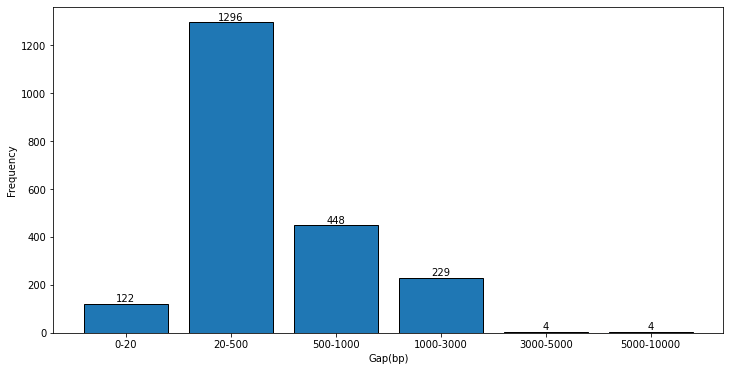

In [54]:
bins = [0,20,500, 1000, 3000,5000, 10000]


# Plot histogram
#n, bins_edges, patches = plt.hist(new_blk.gap, bins=bins, edgecolor='black', rwidth=0.8)

bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
x_positions = np.arange(len(bin_labels))
plt.figure(figsize=(12, 6))
plt.bar(x_positions, n, edgecolor='black', width=0.8)

for count, x in zip(n, x_positions):
    plt.text(x, count, int(count), ha='center', va='bottom')

plt.xticks(ticks=x_positions, labels=bin_labels)

# Customize the plot
plt.xlabel('Gap(bp)')
plt.ylabel('Frequency')
plt.title('')
plt.show()

In [68]:
new_blk.gap.nlargest(10)

1027    62574.0
1192    62197.0
528     51164.0
1360    26775.0
1043    20781.0
85       8599.0
2105     6532.0
1191     6387.0
1321     5212.0
1010     4281.0
Name: gap, dtype: float64

In [89]:
top_indices = new_blk.gap.nlargest(10).index
merged_df = preset_blk.loc[top_indices+1].copy()
#merged_df['gap'] = new_blk.loc[top_indices, 'gap'].astype(int)

In [90]:
merged_df

,chr,start,stop
1028,chr7,144322711,145720732
1193,chr9,64197100,69232276
529,chr4,49709048,53515520
1361,chr11,3323441,4433694
1044,chr8,2468640,3113856
86,chr1,148645763,151565420
2106,chr22,48991961,49715564
1192,chr9,41107093,64134903
1322,chr10,87392058,89027551
1011,chr7,119470599,121405707


In [86]:
new_blk.loc[new_blk.gap.nlargest(10).index+1]

,chr,start,stop,mid,gap
1028,chr7,144291424,145721012,145721012.9,562.0
1193,chr9,64166002,69232345,69232345.9,140.0
529,chr4,49683466,53515735,53515735.9,432.0
1361,chr11,3310054,4433980,4433980.4,573.0
1044,chr8,2458250,3113935,3113935.9,160.0
86,chr1,148641464,151565654,151565654.9,470.0
2106,chr22,48988695,49715775,49715775.4,423.0
1192,chr9,41103900,64166001,64166001.4,62197.0
1322,chr10,87389452,89027837,89027837.4,573.0
1011,chr7,119468459,121405813,121405813.9,214.0


## check actual snp count

In [98]:
org = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/snp_count.txt', sep = ' ', header = None)
new = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/snp_count_nogap.txt', sep = ' ', header = None)

In [99]:
org.columns = ['chr', 'start','end','snp']
new.columns = ['chr', 'start','end','snp']

In [100]:
new

,chr,start,end,snp
0,chr1,10416,2046055,3773
1,chr1,2046056,3356093,3129
2,chr1,3356094,4320209,3503
3,chr1,4320210,5251619,3552
4,chr1,5251620,6197780,3067
...,...,...,...,...
2103,chr22,46079214,47178805,3498
2104,chr22,47178806,48306028,3386
2105,chr22,48306029,48988694,3230
2106,chr22,48988695,49715775,3104


In [114]:
print(org.snp.sum())
print(new.snp.sum())
print(new.snp.sum()- org.snp.sum())

7248411
7248739
328


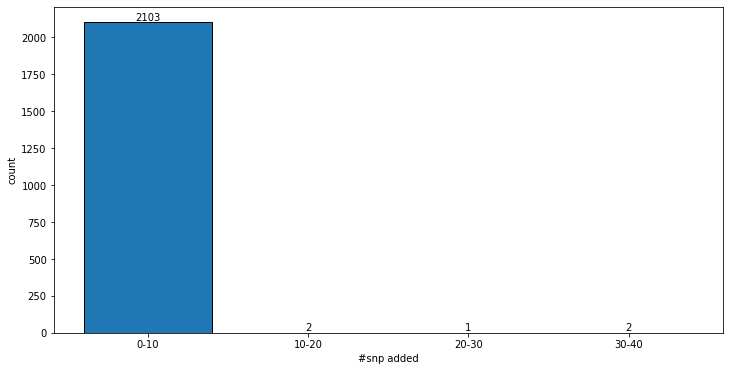

In [113]:
plt.figure(figsize=(12, 6))
bins = [0,10,20,30,40]


# Plot histogram
#n, bins_edges, patches = plt.hist(new.snp-org.snp, bins=bins, edgecolor='black', rwidth=0.8)

bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
x_positions = np.arange(len(bin_labels))
plt.bar(x_positions, n, edgecolor='black', width=0.8)

for count, x in zip(n, x_positions):
    plt.text(x, count, int(count), ha='center', va='bottom')

plt.xticks(ticks=x_positions, labels=bin_labels)

# Customize the plot
plt.xlabel('#snp added')
plt.ylabel('count')
plt.title('')
plt.show()